## **NVIDIA Stock Price Analysis**

The project aims to offer valuable insights into the effectiveness of different
modeling approaches, feature engineering techniques to understand NVIDIA's stock prices. Accurately predicting stock prices can enable investors to make informed investment decisions, potentially leading to higher profits and lower risks.

In [ ]:
import yfinance as yf
start_date = '2000-01-01'
end_date = '2023-08-25'
ticker = 'NVDA'
data = yf.download(ticker, start_date, end_date)
data["Date"] = data.index

data = data[["Date", "Open", "High",
             "Low", "Close", "Adj Close", "Volume"]]

data.reset_index(drop=True, inplace=True)
print(data.head())

[*********************100%%**********************]  1 of 1 completed
        Date      Open      High       Low     Close  Adj Close    Volume
0 2000-01-03  0.984375  0.992188  0.919271  0.975260   0.894802  30091200
1 2000-01-04  0.958333  0.960938  0.901042  0.949219   0.870910  30048000
2 2000-01-05  0.921875  0.937500  0.904948  0.917969   0.842238  18835200
3 2000-01-06  0.917969  0.917969  0.822917  0.858073   0.787283  12048000
4 2000-01-07  0.854167  0.881510  0.841146  0.872396   0.800425   7118400


In [ ]:
data.to_csv("NVDA.csv")

In [ ]:
#Import neccary libraries
!pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

Data Description

We have collected data from Yahoo Finance for our study, and we will be using data points ranging from 2000 to 2023 for Infosys and from 2001 to 2023 for NVIDIA. These datasets may be subject to some preprocessing and may be adjusted slightly to meet the needs of our study. The data consists of five variables that will be particularly useful in the analysis. These variables include date, close price, open price, adjusted close price, and trading volume.


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5949.000000,5949.000000,5949.000000,5949.000000,5949.000000,5.949000e+03
mean,37.713038,38.426996,36.978168,37.730451,37.461562,6.261960e+07
std,74.909100,76.346806,73.395700,74.908555,74.927051,4.364056e+07
min,0.608333,0.656667,0.600000,0.614167,0.563499,4.564400e+06
25%,2.897500,2.977500,2.821250,2.901042,2.661710,3.592880e+07
50%,4.575000,4.652500,4.515000,4.572500,4.280145,5.245680e+07
75%,37.880001,38.592499,37.077499,37.869999,37.492359,7.543320e+07
max,502.160004,502.660004,471.589996,474.940002,474.940002,9.230856e+08


In [ ]:
#create a dataframe using lcosing proces for modelling
close_prices = data[['Date','Adj Close']]
close_stock = close_prices.copy()
#transform features using minmax scaler
del close_prices['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closep=scaler.fit_transform(np.array(close_prices).reshape(-1,1))
print(closep.shape)


(5949, 1)


In [ ]:
#create training and testing size
training_size=int(len(closep)*0.75)
test_size=len(closep)-training_size
train_data,test_data=closep[0:training_size,:],closep[training_size:len(closep),:1]

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ###i=0, 0,1,2,3-----99 100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
#create training and test datasets
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (4445, 15)
y_train:  (4445,)
X_test:  (1472, 15)
y_test (1472,)


Model Selection

*   Random Forest regression (RFR)
*   K-Nearest Neighbor (KNN)
*   Gated Recurrent Units(GRU)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

K = time_step
model = KNeighborsRegressor(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
#  for KNN
# make predictions on training and test sets using the model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# reshape the predictions to match the shape of the target variables
train_predictions_reshaped = train_predictions.reshape(-1, 1)
test_predictions_reshaped = test_predictions.reshape(-1, 1)


In [ ]:
# Converting to original form
train_predict = scaler.inverse_transform(train_predictions_reshaped)
test_predict = scaler.inverse_transform(test_predictions_reshaped)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
#calculating measure values for the model
print("KNN- Train RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("KNN- Train MSE: ", mean_squared_error(original_ytrain,train_predict))
print("KNN- Test RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("KNN- Test MSE: ", mean_squared_error(original_ytest,test_predict))
print("KNN- Train R2 score:", r2_score(original_ytrain, train_predict))
print("KNN- Test R2 score:", r2_score(original_ytest, test_predict))

KNN- Train RMSE:  0.337554366352798
KNN- Train MSE:  0.11394295024383896
KNN- Test RMSE:  135.01211781365117
KNN- Test MSE:  18228.271956527224
KNN- Train R2 score: 0.9974024202664841
KNN- Test R2 score: -0.8834712742551649


In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10
889/889 [==============================] - 28s 23ms/step - loss: 1.4440e-05 - val_loss: 0.0017
Epoch 2/10
889/889 [==============================] - 12s 13ms/step - loss: 5.6142e-06 - val_loss: 0.0019
Epoch 3/10
889/889 [==============================] - 11s 13ms/step - loss: 2.6763e-06 - val_loss: 0.0031
Epoch 4/10
889/889 [==============================] - 12s 13ms/step - loss: 2.5795e-06 - val_loss: 0.0041
Epoch 5/10
889/889 [==============================] - 11s 13ms/step - loss: 2.5257e-06 - val_loss: 0.0042
Epoch 6/10
889/889 [==============================] - 11s 13ms/step - loss: 2.6385e-06 - val_loss: 0.0049
Epoch 7/10
889/889 [==============================] - 11s 13ms/step - loss: 1.5463e-06 - val_loss: 0.0084
Epoch 8/10
889/889 [==============================] - 11s 12ms/step - loss: 1.7165e-06 - val_loss: 0.0079
Epoch 9/10
889/889 [==============================] - 11s 12ms/step - loss: 1.2736e-06 - val_loss: 0.0078
Epoch 10/10
889/889 [=========================

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

46/46 [==============================] - 0s 4ms/step


((4445, 1), (1472, 1))

In [ ]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# Evaluation metrices RMSE and MAE
print("	")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("	")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("	")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("	")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("	")

	
Train data RMSE:  0.8174880681801652
Train data MSE:  0.6682867416169384
Train data MAE:  0.43359752862606327
	
Test data RMSE:  36.38581077277431
Test data MSE:  1323.9272255921394
Test data MAE:  17.29109966107037
	
Train data explained variance regression score: 0.9887941501409533
Test data explained variance regression score: 0.8764053893811675
	
Train data R2 score: 0.9847649363783663
Test data R2 score: 0.8632026719507976
	


Train predicted data:  (5949, 1)
Test predicted data:  (5949, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

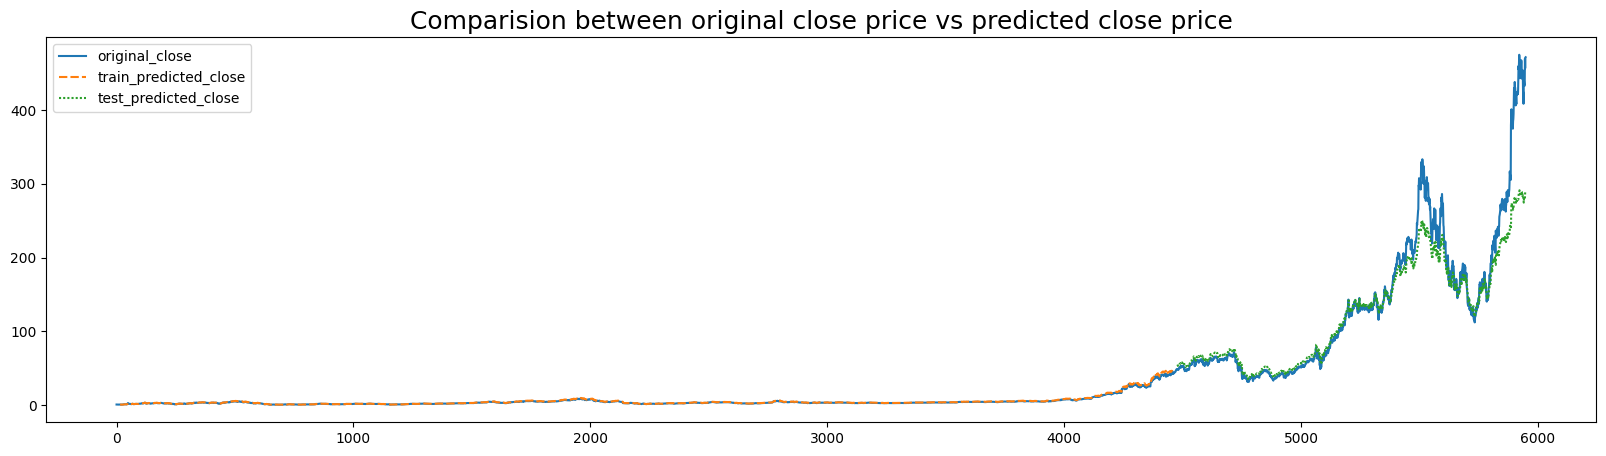

In [ ]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closep)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)
# shift test predictions for plotting
testPredictPlot = np.empty_like(closep)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closep)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)
plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Adj Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
 'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# Lets Do the prediction
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)
train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)
print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (4445, 1)
Test data prediction: (1472, 1)


In [ ]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

---------------------------------------------------------------------------------------------------------
Train data RMSE:  0.09745153331168083
Train data MSE:  0.009496801344797638
Test data MAE:  0.0445290355102233
---------------------------------------------------------------------------------------------------------
Test data RMSE:  133.53568495210834
Test data MSE:  17831.779155628734
Test data MAE:  91.2272572972334
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9997835182874458
Test data explained variance regression score: 0.013810129875927779
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.999783499561371
Test data R2 score: -0.842502892681624
